<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 1 ｜ Importing Necessary Libraries
</div>

## 회사들은 두 가지 질문에 관심이 있습니다.

#### Q. 캠페인이 성공적일 수 있을까?
#### Q. 캠페인이 성공적이었다면, 그 성공의 얼마나 많은 부분이 광고 덕분이라고 할 수 있을까? 전환율은 ? (전환율 = 특정 행동을 실제로 수행한 사람의 비율)

In [74]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams['font.family'] = 'Malgun Gothic'  # 한글 폰트 설정
mpl.rcParams['axes.unicode_minus'] = False     # 마이너스 깨짐 방지


<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 2 ｜ Loading Data
</div>

In [75]:
df = pd.read_csv("C://Users//wkdal//DREW_PY//2025//Personal_Projects//AB Testing Analysis//marketing_AB.csv")

In [76]:
# A/B 테스트를 통한 마케팅 캠페인에 대한 기본 데이터 세트
df = df.rename(columns = {
    "user id" : "사용자ID",
    "test group" : "테스트_그룹",
    "converted" : "구매T/F",
    "total ads" : "총_광고수",
    "most ads day" : "가장많은광고가나온날",
    "most ads hour": "가장많은광고가나온시간"
})

In [77]:
df.drop(columns = ['Unnamed: 0','사용자ID'], inplace=True)

In [78]:
df

,테스트_그룹,구매T/F,총_광고수,가장많은광고가나온날,가장많은광고가나온시간
0,ad,False,130,Monday,20
1,ad,False,93,Tuesday,22
2,ad,False,21,Tuesday,18
3,ad,False,355,Tuesday,10
4,ad,False,276,Friday,14
...,...,...,...,...,...
588096,ad,False,1,Tuesday,23
588097,ad,False,1,Tuesday,23
588098,ad,False,3,Tuesday,23
588099,ad,False,1,Tuesday,23


<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 3 ｜ EDA
</div>

In [79]:
df.shape

(588101, 5)

In [80]:
df.dtypes

테스트_그룹         object
구매T/F            bool
총_광고수           int64
가장많은광고가나온날     object
가장많은광고가나온시간     int64
dtype: object

In [81]:
df.isnull().sum()

테스트_그룹         0
구매T/F          0
총_광고수          0
가장많은광고가나온날     0
가장많은광고가나온시간    0
dtype: int64

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   테스트_그룹       588101 non-null  object
 1   구매T/F        588101 non-null  bool  
 2   총_광고수        588101 non-null  int64 
 3   가장많은광고가나온날   588101 non-null  object
 4   가장많은광고가나온시간  588101 non-null  int64 
dtypes: bool(1), int64(2), object(2)
memory usage: 18.5+ MB


In [83]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
총_광고수,588101.0,24.820876,43.715181,1.0,4.0,13.0,27.0,2065.0
가장많은광고가나온시간,588101.0,14.469061,4.834634,0.0,11.0,14.0,18.0,23.0


In [84]:
print("테스트_그룹 : ", df['테스트_그룹'].unique() )
print("가장많은광고가나온날 : ", df['가장많은광고가나온날'].unique() )
print("가장많은광고가나온시간  : ", df['가장많은광고가나온시간'].unique() )

테스트_그룹 :  ['ad' 'psa']
가장많은광고가나온날 :  ['Monday' 'Tuesday' 'Friday' 'Saturday' 'Wednesday' 'Sunday' 'Thursday']
가장많은광고가나온시간  :  [20 22 18 10 14 13 19 11 12 16 21  3 23  4  8  0  2 15  1  6 17  7  9  5]


<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 4 ｜ Data Preprocessing
</div>


In [85]:
df['구매T/F'] = df['구매T/F'].astype(int)
df.dtypes

테스트_그룹         object
구매T/F           int64
총_광고수           int64
가장많은광고가나온날     object
가장많은광고가나온시간     int64
dtype: object

<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 5 ｜ Statistical Testing & Interpretation
</div>


### 그룹이 2개 일 때, t-검정
### 두 그룹의 평균(=전환율)이 통계적으로 차이가 있는지 독립표본 t-검정을 수행합니다.

In [86]:
control_group = df[df['테스트_그룹'] == 'psa'] # PSA(공익광고) 보여준 그룹 데이터만 모았습니다.
test_group = df[df['테스트_그룹'] == 'ad'] #실제 광고(ad)를 보여준 그룹 데이터만 모았습니다.
t_stat, p_val = stats.ttest_ind(test_group['구매T/F'], control_group['구매T/F'])
print(f"Test Group Analysis - T-statistic: {t_stat}, P-value: {p_val}")

Test Group Analysis - T-statistic: 7.37040597428566, P-value: 1.7033052627831264e-13


공익광고를 본 사람들과 실제 광고를 본 사람들이 서로 다른지 비교하는 통계 검정을 했습니다.

t-test가 하는 일:

    - “두 그룹의 평균(=구매율)이 통계적으로 다르냐?”를 계산합니다.
    - t_stat : 두 그룹 차이가 얼마나 큰지를 숫자로 표현합니다.
    - p_val : 이 차이가 우연일 확률입니다.

t-test의 기본 가설:

    - 귀무가설(H₀) : 두 그룹의 구매율은 같다

    - 대립가설(H₁) : 두 그룹의 구매율은 다르다

    - p-value가 0.05보다 훨씬 작으면?:

        귀무가설 거부

stats.ttest_ind() : 독립표본 t-검정



In [87]:
if p_val < 0.05:
    print("귀무가설을 기각한다: 'ad' 그룹과 'psa' 그룹의 전환율에는 통계적으로 유의한 차이가 있다는 뜻입니다."
          "                                                                                     "
          "두 그룹의 전환율이 다르다고 결론낼 수 있습니다."
          "   "
          "광고(ad)가 실제로 구매 행동에 영향을 주었을 가능성이 높습니다.")
else:
    print("귀무가설을 기각하지 못한다: 'ad' 그룹과 'psa' 그룹의 전환율에는 통계적으로 유의한 차이가 없다는 뜻입니다."
          "                                                                                     "
          "즉, 두 그룹의 전환율 차이가 우연일 가능성이 큽니다."
          "                                                                                     "
          "광고(ad)가 구매 행동에 영향을 주었다고 말할 근거가 없습니다.")

귀무가설을 기각한다: 'ad' 그룹과 'psa' 그룹의 전환율에는 통계적으로 유의한 차이가 있다는 뜻입니다.                                                                                     두 그룹의 전환율이 다르다고 결론낼 수 있습니다.   광고(ad)가 실제로 구매 행동에 영향을 주었을 가능성이 높습니다.


#### 결과 해석

p-value = 1.7e-13 = 0.00000000000017
두 그룹의 구매율 차이가 우연으로 발생할 확률은 사실상 0에 가까움을 뜻 합니다.

광고(ad)는 PSA보다 구매를 유의미하게 더 많이 유도했다.

### 그룹이 3개 이상일 때, ANOVA test(Analysis of Variance, 분산분석)

    ANOVA(일원분산분석) 은 세 개 이상 그룹의 평균이 서로 다른지 통계적으로 검정하는 방법이다.

    즉,

    “월요일, 화요일, 수요일… 그룹들의 평균이 동일한가?”

    또는

    “A/B/C 광고 유형 중 효과가 다른 게 있는가?”

    를 판단하는 기법.

1) 왜 ‘분산(Variance)을 분석’한다고 부르나요?

    비록 목적은 평균(mean) 비교지만, 평균 차이를 계산하기 위해, 그룹 간 차이(Between-group variance), 그룹 내부 변동성(Within-group variance)

    두 가지 분산을 비교하기 때문에 “분산분석”이라 부른다.

2) 가설(Hypothesis)

   귀무가설(H₀)

    모든 그룹의 평균은 같다.

    대립가설(H₁)

    적어도 한 그룹의 평균은 다르다.
    (= 하나 이상 그룹이 특이하게 높거나 낮다)

    결과로 나오는 것
    F-statistic : 그룹 간 평균 차이가 그룹 내부 변화보다 얼마나 큰지 나타내는 비율.

    p-value :그 차이가 우연이 아닐 가능성. p < 0.05 → 그룹 평균이 다르다고 판단.

In [88]:

anova_result_day = stats.f_oneway(
    df[df['가장많은광고가나온날'] == 'Monday']['구매T/F'],
    df[df['가장많은광고가나온날'] == 'Tuesday']['구매T/F'],
    df[df['가장많은광고가나온날'] == 'Wednesday']['구매T/F'],
    df[df['가장많은광고가나온날'] == 'Thursday']['구매T/F'],
    df[df['가장많은광고가나온날'] == 'Friday']['구매T/F'],
    df[df['가장많은광고가나온날'] == 'Saturday']['구매T/F'],
    df[df['가장많은광고가나온날'] == 'Sunday']['구매T/F']
)
print(f"가장 많은 광고가 나온 날 (결과) - F-statistic: {anova_result_day.statistic}, P-value: {anova_result_day.pvalue}")

가장 많은 광고가 나온 날 (결과) - F-statistic: 68.38818386898062, P-value: 1.8032007655359555e-85


#### 해석

    요일별 구매 행동 차이에 대한 ANOVA 결과 해석(상세 버전)

    요일별 구매 행동 차이를 검정하기 위해 일원분산분석(ANOVA) 을 수행한 결과,
    F(6, N−7) = 68.39, p = 1.80 × 10⁻⁸⁵로 나타났습니다.

    이 결과를 해석하기 위해 ANOVA의 의미를 단계적으로 살펴보면 다음과 같습니다.

1. ANOVA의 목적: 요일별 평균 구매율이 같은지 검정

    ANOVA의 귀무가설(H₀)은 다음과 같습니다:

    “요일이 달라도 구매율의 평균은 모두 동일하다.”
    즉, 요일은 구매 행동에 영향을 주지 않는다.

    반면 대립가설(H₁)은:

    “적어도 하나 이상의 요일은 구매율 평균이 다른 요일과 유의하게 다르다.”


2. F-statistic = 68.39의 의미

    F값은 (요일 간 평균 차이 크기) ÷ (각 요일 내부의 변화 정도)

    라는 비율로 계산되는데,

    F = 68.39는 요일 간 평균 구매율 차이가 매우 크고, 동일 요일 안에서의 변동성은 상대적으로 적다는 것을 의미합니다.

    즉, 월요일, 화요일, 수요일… 등 요일별 구매율이 실제로 크게 다르게 나타난다는 통계적 신호입니다.


3. p-value = 1.80 × 10⁻⁸⁵ : 사실상 ‘0’에 가까움

    이 p-value는 “요일별 구매율 차이가 우연히 나타날 확률”을 의미하는데,

    1.80 × 10⁻⁸⁵ 는 0.000000000000000000000000000000000000000000000000000000000000000000018 정도로,

    통계적으로 거의 불가능한 수준의 확률입니다.


    따라서,

    유의수준 0.05

    유의수준 0.01

    심지어 0.0001 기준에서도

    귀무가설은 완전히 기각됩니다.

    즉, 요일별 구매율은 우연이 아니라 실제로 차이가 존재한다고 볼 수 있습니다.


4. 결론: 요일은 구매 전환율에 유의미한 영향을 준다

    검정 결과를 종합하면:

    요일별 구매율 평균에 매우 강력한 통계적 차이가 존재하며

    고객의 구매 행동은 광고가 가장 많이 노출된 요일에 따라 유의하게 달라진다

    따라서 다음 결론을 내릴 수 있습니다:

    “광고가 집중적으로 노출되는 요일은 실제로 고객의 구매 전환 행동을 설명하는 중요한 요인이다.”


5. 비즈니스 인사이트 (Business Insight)

    요일별 전환율 차이가 명확하기 때문에, 기업은 다음 전략을 고려할 수 있습니다:

    전환율이 높은 요일에 광고 예산을 집중 배치하여 ROAS 최적화

    전환율이 낮은 요일에는 A/B 테스트를 통한 소재·타겟 개선 또는 예산 축소

    요일 기반 사용자 행동 패턴을 캠페인 자동 최적화 로직에 활용

    즉, 요일별 반응성 차이는 광고 캠페인의 성과를 극대화하는 데 중요한 전략 요소입니다.


6. 추가 분석 필요 요소

    ANOVA는 "요일별 평균이 다르다"까지만 알려줍니다.

    따라서:

    어떤 요일이 가장 높은지

    어떤 요일끼리 차이가 유의한지

는 Tukey HSD(사후분석) 으로 추가 검정이 필요합니다.

stats.f_oneway()는 일원분산분석(ANOVA) 함수

    - 여러 '그룹 간' 평균이 서로 다른지 한 번에 비교할 때 사용

    - 여기서는 요일 7개 그룹의 구매율을 비교하는 것

        월요일 평균 = 0.18

        화요일 평균 = 0.22

        수요일 평균 = 0.14

ANOVA의 핵심 공식 : F-statistic(에프 통계량)

    - ANOVA(일원분산분석)에서 계산되는 값으로, 요일별 구매율 차이가 실제로 존재하는지”를 측정하는 숫자

    - 그룹들(월~일 7개 요일) 사이의 차이가 크면 → F-statistic 값이 크게 나온다.

    - 그룹들 간 차이가 거의 없으면 → F-statistic 값이 작게 나온다.

    - F-statistic = (요일 간 평균 차이의 크기) ÷ (요일 내부의 변동성)

    1) 요일 간 변동성(Between-group variance)

    쉽게 말하면:

    월요일 평균 구매율이 0.20

    화요일 평균 구매율이 0.35

    수요일 평균 구매율이 0.10

    이렇게 요일별 평균이 서로 멀리 떨어져 있으면 요일 간 변동성이 크다.

    2) 요일 내부 변동성(Within-group variance)

    같은 요일 안에서 사람들 구매 행동이 얼마나 들쑥날쑥한지

    예를 들어, 월요일 데이터가 다음처럼 흩어져 있다고 하자:

    0, 1, 1, 0, 1, 0, 0, 1...


    만약 거의 다 0 이면 → 내부 변동성 ↓ (한쪽으로 모임)

    만약 0과 1이 섞여서 시끄러움 → 내부 변동성 ↑

    즉,

    데이터가 한쪽으로 뭉쳐 있으면 → 내부 변동성 낮음

    데이터가 이리저리 퍼져 있으면 → 내부 변동성 높음

df[df['가장많은광고가나온날'] == 'Monday']['구매T/F']

    - '가장많은광고가나온날'이 Monday인 고객만 선택하고

    - 그 고객들의 '구매T/F'(0/1)를 가져와서

    - ANOVA 함수에 “Monday 그룹의 구매율 데이터”로 넣습니다.

Scipy는 t-test 결과 객체를 자동으로 만들어서 돌려줍니다.

    그 객체 안에는 두 가지 기본 속성이 있음:

    속성	        의미
    .statistic	t-통계량(t-statistic)
    .pvalue	    p-value


In [89]:
if anova_result_day.pvalue < 0.05:
    print("귀무가설을 기각합니다: 광고가 가장 많이 노출된 요일은 구매율에 유의미한 영향을 미칩니다.")
else:
    print("귀무가설을 기각하지 못합니다: 광고가 가장 많이 노출된 요일은 구매율에 유의미한 영향을 미치지 않습니다.")


귀무가설을 기각합니다: 광고가 가장 많이 노출된 요일은 구매율에 유의미한 영향을 미칩니다.


In [90]:
anova_result_hour = stats.f_oneway(
    df[df['가장많은광고가나온시간'] == 0]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 1]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 2]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 3]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 4]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 5]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 6]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 7]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 8]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 9]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 10]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 11]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 12]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 13]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 14]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 15]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 16]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 17]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 18]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 19]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 20]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 21]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 22]['구매T/F'],
    df[df['가장많은광고가나온시간'] == 23]['구매T/F']
)

print(f"Most Ads Hour Analysis - F-statistic: {anova_result_hour.statistic}, P-value: {anova_result_hour.pvalue}")


Most Ads Hour Analysis - F-statistic: 18.742037312974496, P-value: 7.482025334833055e-77


In [91]:
if anova_result_hour.pvalue < 0.05:
    print("귀무가설을 기각합니다: 광고가 가장 많이 노출된 시간대는 구매율에 유의미한 영향을 미칩니다.")
else:
    print("귀무가설을 기각하지 못합니다: 광고가 가장 많이 노출된 시간대는 구매율에 유의미한 영향을 미치지 않습니다.")


귀무가설을 기각합니다: 광고가 가장 많이 노출된 시간대는 구매율에 유의미한 영향을 미칩니다.


### 결과 해석

시간대별 구매 행동 차이를 검정하기 위해 일원분산분석(ANOVA) 을 수행한 결과,
F(23, N−24) = 18.74, p = 7.48 × 10⁻⁷⁷ 로 나타났습니다.

해석을 위해 먼저 ANOVA가 무엇을 검정하는지 짚어보면 다음과 같습니다.

1. ANOVA의 의미: ‘평균이 모두 같다는 가설’을 검정

    ANOVA의 귀무가설(H₀)은 다음과 같습니다:

    “광고가 가장 많이 노출된 시간대에 따라 구매율의 평균은 모두 동일하다.”

    즉, 시간대가 달라도 구매 전환 비율이 같다(영향 없음)는 가설입니다.

    반면 대립가설(H₁)은:

    “적어도 한 시간대의 구매율 평균은 다른 시간대와 유의하게 다르다.”

    즉, 시간대가 구매 행동에 영향을 준다는 주장입니다.

2. F-statistic = 18.74: 시간대 간 평균 차이가 매우 크다는 의미

    F값은 다음 비율로 계산됩니다:

    (시간대 간 평균 차이 크기) ÷ (시간대 내부의 데이터 변동성)


    F가 18.74처럼 매우 크다는 것은,

    시간대 간 구매율 평균 차이가 크고

    같은 시간대 안에서는 구매 여부가 상대적으로 안정적(덜 퍼짐)

    이라는 의미입니다.

    즉, 시간대에 따라 구매하는 비율이 실제로 달라 보인다는 신호입니다.

3. p-value = 7.48 × 10⁻⁷⁷ : 사실상 ‘0’에 가까운 확률

    p-value는 “관측된 차이가 우연히 발생할 확률”을 의미하는데,

    7.48 × 10⁻⁷⁷ =
    0.000000000000000000000000000000000000000000000000000000000000000000748

    이 정도 수준은 통계적으로 거의 불가능한 확률입니다.

    즉,

    "시간대에 따라 구매율이 다르게 보이는 현상은 우연이 아니다"라는 매우 강력한 증거입니다.

    유의수준 0.05는 물론 0.001보다도 훨씬 작은 값이므로 귀무가설은 완전히 기각됩니다.

4. 결론: 시간대는 구매 행동에 유의한 영향을 미친다

    검정 결과를 종합하면 다음과 같습니다:

    시간대별 구매율 평균에 유의미한 차이 존재

    특정 시간대는 구매 전환이 더 활발하거나, 반대로 낮은 패턴을 가짐

    즉, 광고가 가장 많이 노출된 시간대는 고객의 구매 행동을 설명할 수 있는 중요한 요인

    따라서 다음 결론을 내릴 수 있습니다:

    “광고가 주로 노출되는 시간대는 고객 구매 전환율에 실질적인 영향을 미친다.”

🔸 5. 비즈니스 관점에서의 함의

    이 결과는 광고 시간대를 조정함으로써 다음과 같은 전략적 개선이 가능함을 시사합니다:

    전환율이 높은 시간대에 광고 예산 집중 → ROAS 극대화

    전환율이 낮은 시간대에는 타겟·소재 개선 혹은 예산 축소

    시간대별 구매 패턴을 기반으로 고객 행동 모델링 가능

    캠페인 자동 최적화 알고리즘에 시간대 가중치 적용 가능

즉, 단순 조회가 아닌 전환 중심 예산 배분 전략이 가능해집니다.

6. 추가 분석 필요 요소

    ANOVA는 “차이가 있다”까지만 알려주므로,

    “어떤 시간대끼리 차이가 있는지”,

    “어떤 시간대가 가장 높은지”는 사후분석(Tukey HSD) 을 통해 확인합니다.

In [92]:
# Total Ads Analysis (총 광고 노출 수가 구매율에 영향을 주는지 분석)

# total ads가 50 미만인 데이터만 선택해서 새로운 데이터프레임으로 복사합니다.
df_subset = df[df['총_광고수'] < 50].copy()

# total ads에 대한 구간(bins)을 만들어 변수로 변환하는 작업입니다.
# pd.cut()은 연속형 숫자 데이터를 구간형 카테고리로 변환하는 함수입니다.
# -1~1, 2~5, 6~10 ... 등 구간으로 나눠 'total_ads_bin'이라는 새 컬럼에 저장합니다.
df_subset.loc[:, 'total_ads_bin'] = pd.cut(
    df_subset['총_광고수'],
    bins=[-1, 1, 5, 10, 20, 30, 40, 50],  # 광고 수 범위
    labels=['0-1', '2-5', '6-10', '11-20', '21-30', '31-40', '41-50']  # 각 구간 이름
)

# 구간별(total_ads_bin)로 구매 여부(구매T/F)의 평균이 서로 다른지 ANOVA 분석을 수행합니다.
anova_result_bin = stats.f_oneway(
    df_subset[df_subset['total_ads_bin'] == '0-1']['구매T/F'],    # 광고 0~1회 노출 그룹
    df_subset[df_subset['total_ads_bin'] == '2-5']['구매T/F'],    # 광고 2~5회 노출 그룹
    df_subset[df_subset['total_ads_bin'] == '6-10']['구매T/F'],   # 광고 6~10회 노출 그룹
    df_subset[df_subset['total_ads_bin'] == '11-20']['구매T/F'],  # 광고 11~20회 노출 그룹
    df_subset[df_subset['total_ads_bin'] == '21-30']['구매T/F'],  # 광고 21~30회 노출 그룹
    df_subset[df_subset['total_ads_bin'] == '31-40']['구매T/F'],  # 광고 31~40회 노출 그룹
    df_subset[df_subset['total_ads_bin'] == '41-50']['구매T/F']   # 광고 41~50회 노출 그룹
)

# ANOVA 분석 결과(F-statistic, p-value)를 출력합니다.
print(f"Total Ads (Binned) Analysis - F-statistic: {anova_result_bin.statistic}, P-value: {anova_result_bin.pvalue}")


Total Ads (Binned) Analysis - F-statistic: 1245.6689124986833, P-value: 0.0


In [93]:
if anova_result_bin.pvalue < 0.05:
    print("귀무가설을 기각합니다: 광고 노출 수(구간별)에 따라 구매율에 유의미한 차이가 있습니다.")
else:
    print("귀무가설을 기각하지 못합니다: 광고 노출 수(구간별)는 구매율에 유의미한 영향을 미치지 않습니다.")


귀무가설을 기각합니다: 광고 노출 수(구간별)에 따라 구매율에 유의미한 차이가 있습니다.


<div style="
    background: linear-gradient(90deg, #ff5f6d, #ffc371);
    color: white;
    padding: 18px 32px;
    border-radius: 40px;
    font-size: 26px;
    font-weight: 600;
    text-align: center;
    box-shadow: 0 4px 10px rgba(0,0,0,0.18);
    letter-spacing: 0.5px;
">
     Step 6 ｜ Visualizations
</div>


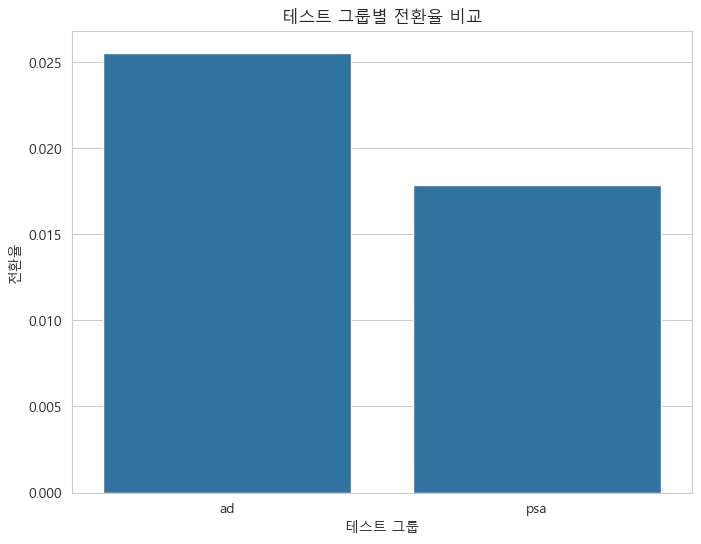

In [94]:
# 테스트 그룹별 전환율 계산
conversion_rates = df.groupby('테스트_그룹')['구매T/F'].mean().reset_index()

# 컬럼명 한글로 재설정
conversion_rates.columns = ['테스트_그룹', '전환율']

# 시각화
plt.figure(figsize=(8, 6))
sns.barplot(x='테스트_그룹', y='전환율', data=conversion_rates)
plt.title('테스트 그룹별 전환율 비교')
plt.xlabel('테스트 그룹')
plt.ylabel('전환율')
plt.show()


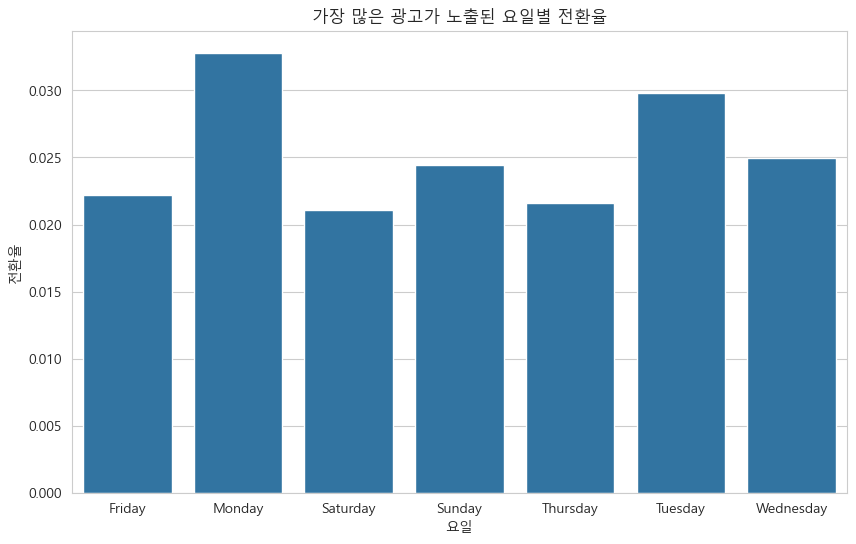

In [96]:
# 요일별 전환율 계산
day_conversion_rate = df.groupby('가장많은광고가나온날')['구매T/F'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=day_conversion_rate, x='가장많은광고가나온날', y='구매T/F')

plt.title('가장 많은 광고가 노출된 요일별 전환율')
plt.xlabel('요일')
plt.ylabel('전환율')

plt.show()


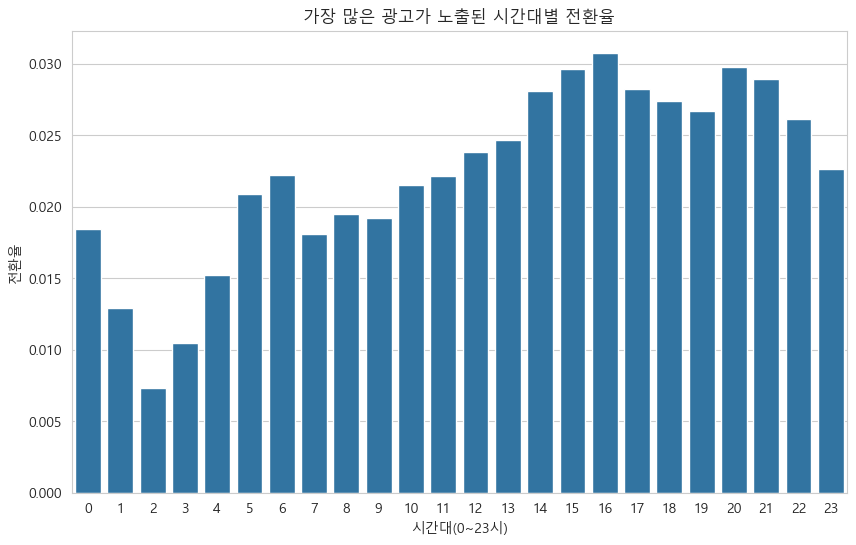

In [98]:
# 시간대별 전환율 계산
hour_conversion_rate = df.groupby('가장많은광고가나온시간')['구매T/F'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=hour_conversion_rate, x='가장많은광고가나온시간', y='구매T/F')

plt.title('가장 많은 광고가 노출된 시간대별 전환율')
plt.xlabel('시간대(0~23시)')
plt.ylabel('전환율')

plt.show()


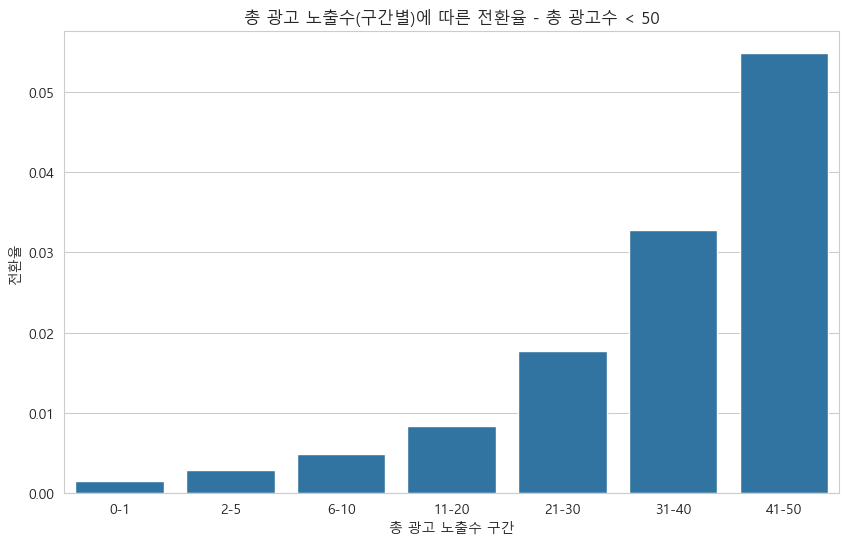

In [99]:
# 총 광고수 구간별 전환율 계산
ads_conversion_rate_bin = df_subset.groupby('total_ads_bin')['구매T/F'].mean().reset_index()

# 시각화
plt.figure(figsize=(10, 6))
sns.barplot(data=ads_conversion_rate_bin, x='total_ads_bin', y='구매T/F')

plt.title('총 광고 노출수(구간별)에 따른 전환율 - 총 광고수 < 50')
plt.xlabel('총 광고 노출수 구간')
plt.ylabel('전환율')

plt.show()
